# Info:

This file compares the models for 16 features:
['public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count', 'verified',
       'Number', 'Links_mean', 'Links_std', 'Words_std', 'Words_mean',
       'Mentions_std', 'Mentions_mean', 'Hashtags_std', 'Hashtags_mean', 'RT']

We also do Backward and Forward Feature Selection
2nd part of the file drops 'verified' and does the same.

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [52]:
df_user_path = '/content/drive/MyDrive/Twibot-20/final_dataframes/df_final_features16.pickle'
df_user = pd.read_pickle(df_user_path)

In [53]:
df_user

,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,verified,label,Number,Links_mean,Links_std,Words_std,Words_mean,Mentions_std,Mentions_mean,Hashtags_std,Hashtags_mean,RT
u17461978,3.350021,-0.098376,-0.143977,4.617003,1.0,human,0.477448,1.035000,0.466106,155.024095,24.355000,0.460704,1.040000,0.466106,1.035000,0.165000
u17685258,0.019825,-0.101904,-0.195296,0.171824,1.0,human,0.477448,0.475000,0.300879,101.380804,19.810000,0.300879,0.475000,0.300879,0.475000,0.650000
u15750898,-0.079544,-0.031577,2.051214,0.018954,1.0,human,0.477448,0.865000,0.318367,90.284196,24.415000,0.322010,0.860000,0.322010,0.860000,0.380000
u1659167666,-0.151292,-0.099108,-0.260225,-0.159411,0.0,bot,-1.320166,0.647727,0.230799,45.558516,13.431818,0.227273,0.659091,0.230799,0.647727,0.522727
u34743251,2.722638,-0.108065,-0.202958,2.663798,1.0,human,0.477448,0.890000,0.470251,96.887211,17.415000,0.470251,0.890000,0.474146,0.885000,0.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u452754350,-0.152562,0.022119,-0.233522,-0.152906,0.0,bot,0.477448,0.835000,0.259070,81.134774,20.470000,0.265729,0.840000,0.262412,0.830000,0.200000
u850435801687183362,-0.152405,-0.102993,0.340078,-0.158257,0.0,bot,0.477448,0.540000,0.269749,90.186910,16.095000,0.278894,0.550000,0.269749,0.540000,0.150000
u2188795745,-0.154263,-0.077746,-0.226088,-0.163713,0.0,bot,0.477448,0.365000,0.333442,102.492236,15.515000,0.346106,0.375000,0.333442,0.365000,0.470000
u940687680,-0.154298,-0.093060,-0.259637,-0.164028,0.0,bot,-0.405309,0.262069,0.208621,44.658333,16.600000,0.211877,0.268966,0.208621,0.262069,0.917241


# Use Random Forest to Predict Human or Bot

## Split train and test

In [54]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with a 70:30 ratio
train_set, test_set = train_test_split(df_user, test_size=0.3, random_state=42)

In [ ]:
train_set

In [ ]:
print("Train_humans", train_set[train_set['label'] == 'human'].shape[0])
print("Train_bots", train_set[train_set['label'] == 'bot'].shape[0])

In [ ]:
test_set

In [ ]:
print("Test_humans", test_set[test_set['label'] == 'human'].shape[0])
print("Test_bots", test_set[test_set['label'] == 'bot'].shape[0])


In [55]:
train_labels = train_set['label']
train_set = train_set.drop(['label'], axis=1)

test_labels = test_set['label']
test_set = test_set.drop('label', axis=1)

train_labels

u2345445692             human
u87545695               human
u202766654              human
u1264160019940925442      bot
u2179229660               bot
                        ...  
u805421729338314753       bot
u2291202847             human
u1215730263973482496      bot
u852149624911650816     human
u422445068                bot
Name: label, Length: 8222, dtype: object

In [ ]:
print(train_set.columns)

## Function to Train on Models

In [56]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def train_and_pred(model):

  print('Training...' + str(model))
  # fit model
  model.fit(train_set, train_labels)

  test_pred = model.predict(test_set)

  # get accuracy
  accuracy = accuracy_score(test_labels, test_pred)

  # get precision
  precision = precision_score(test_labels, test_pred, pos_label="bot")

  # get recall
  recall = recall_score(test_labels, test_pred, pos_label="bot")


  # get f1
  f1 = f1_score(test_labels, test_pred, pos_label="bot")

   
  return {'accuracy': accuracy,'precision' : precision, 'recall': recall, 'f1':f1}

## Train and test here for accuracy

In [57]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}
accuracies = {model: 0 for model in models}
for model in models:
  accuracies[model] = train_and_pred(models[model])

accuracies

Training...RandomForestClassifier()
Training...AdaBoostClassifier()
Training...DecisionTreeClassifier()
Training...MLPClassifier()
Training...KNeighborsClassifier()


{'RandomForestClassifier': {'accuracy': 0.8070374574347332,
  'precision': 0.7672268907563026,
  'recall': 0.9354508196721312,
  'f1': 0.843028624192059},
 'AdaBoostClassifier': {'accuracy': 0.8033484676503972,
  'precision': 0.7668503603221705,
  'recall': 0.9267418032786885,
  'f1': 0.8392484342379959},
 'DecisionTreeClassifier': {'accuracy': 0.7420544835414302,
  'precision': 0.7726084683742812,
  'recall': 0.757172131147541,
  'f1': 0.7648124191461837},
 'MLPClassifier': {'accuracy': 0.804199772985244,
  'precision': 0.7488170347003155,
  'recall': 0.9728483606557377,
  'f1': 0.8462566844919787},
 'KNeighborsClassifier': {'accuracy': 0.6782065834279228,
  'precision': 0.6814551907719609,
  'recall': 0.7868852459016393,
  'f1': 0.7303851640513551}}

In [58]:
df_results = pd.DataFrame.from_dict(accuracies, orient='index')
df_results

,accuracy,precision,recall,f1
RandomForestClassifier,0.807037,0.767227,0.935451,0.843029
AdaBoostClassifier,0.803348,0.766850,0.926742,0.839248
DecisionTreeClassifier,0.742054,0.772608,0.757172,0.764812
MLPClassifier,0.804200,0.748817,0.972848,0.846257
KNeighborsClassifier,0.678207,0.681455,0.786885,0.730385


## Plot results of training

In [59]:
data = accuracies

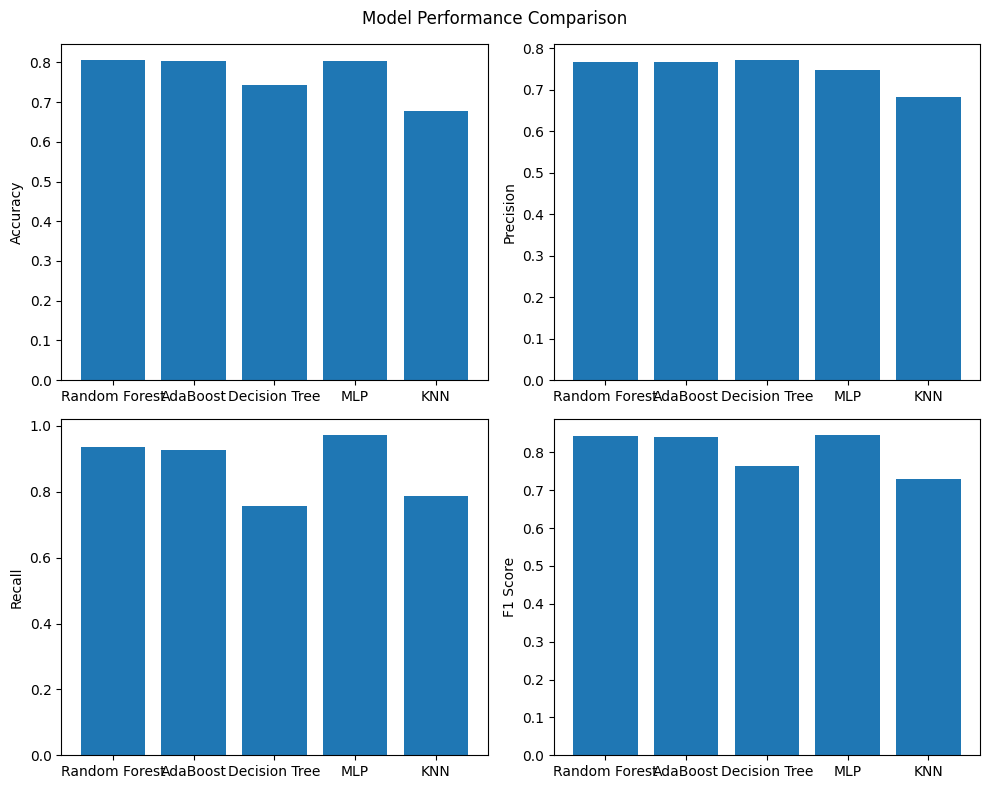

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the metrics for each model
models = list(data.keys())
accuracy = [data[model]['accuracy'] for model in models]
precision = [data[model]['precision'] for model in models]
recall = [data[model]['recall'] for model in models]
f1 = [data[model]['f1'] for model in models]

# Set the x-axis labels and positions
labels = ['Random Forest', 'AdaBoost', 'Decision Tree', 'MLP', 'KNN']
x_pos = np.arange(len(labels))

# Create the subplots for each metric
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Accuracy plot
axs[0, 0].bar(x_pos, accuracy)
axs[0, 0].set_xticks(x_pos)
axs[0, 0].set_xticklabels(labels)
axs[0, 0].set_ylabel('Accuracy')

# Precision plot
axs[0, 1].bar(x_pos, precision)
axs[0, 1].set_xticks(x_pos)
axs[0, 1].set_xticklabels(labels)
axs[0, 1].set_ylabel('Precision')

# Recall plot
axs[1, 0].bar(x_pos, recall)
axs[1, 0].set_xticks(x_pos)
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_ylabel('Recall')

# F1 plot
axs[1, 1].bar(x_pos, f1)
axs[1, 1].set_xticks(x_pos)
axs[1, 1].set_xticklabels(labels)
axs[1, 1].set_ylabel('F1 Score')

# Set the title and layout
fig.suptitle('Model Performance Comparison')
fig.tight_layout()

# Show the plot
plt.show()

## Feature Importances

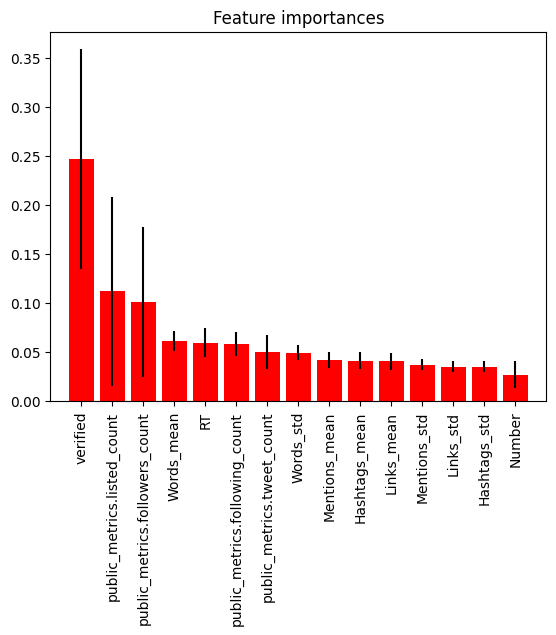

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_set, train_labels)
test_pred = rfc.predict(test_set)

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_set.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_set.shape[1]), train_set.columns[indices], rotation=90)
plt.xlim([-1, train_set.shape[1]])
plt.show()


## Forward and Backward Feature Selection

In [24]:
#select best user features for determining bot or not using both forwards and backwards selection

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


X_train = df_user.drop('label', axis=1)
y_train = df_user['label']

forward = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), n_features_to_select=4, direction='forward').fit(X_train, y_train)
forward_features = X_train.columns[forward.get_support()]

backward = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), n_features_to_select=4, direction='backward').fit(X_train, y_train)
backward_features = X_train.columns[backward.get_support()]

print("Top features using forward selection: ", list(forward_features))
print("Top features using backward selection: ", list(backward_features))

Top features using forward selection:  ['verified', 'Words_mean', 'Mentions_mean', 'Hashtags_mean']
Top features using backward selection:  ['verified', 'Number', 'Mentions_mean', 'RT']


# Use Random Forest to Predict Human or Bot - Without verfied

In [25]:
df_user = df_user.drop(columns = ['verified'])
df_user

,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,label,Number,Links_mean,Links_std,Words_std,Words_mean,Mentions_std,Mentions_mean,Hashtags_std,Hashtags_mean,RT
u17461978,3.350021,-0.098376,-0.143977,4.617003,human,0.477448,1.035000,0.466106,155.024095,24.355000,0.460704,1.040000,0.466106,1.035000,0.165000
u17685258,0.019825,-0.101904,-0.195296,0.171824,human,0.477448,0.475000,0.300879,101.380804,19.810000,0.300879,0.475000,0.300879,0.475000,0.650000
u15750898,-0.079544,-0.031577,2.051214,0.018954,human,0.477448,0.865000,0.318367,90.284196,24.415000,0.322010,0.860000,0.322010,0.860000,0.380000
u1659167666,-0.151292,-0.099108,-0.260225,-0.159411,bot,-1.320166,0.647727,0.230799,45.558516,13.431818,0.227273,0.659091,0.230799,0.647727,0.522727
u34743251,2.722638,-0.108065,-0.202958,2.663798,human,0.477448,0.890000,0.470251,96.887211,17.415000,0.470251,0.890000,0.474146,0.885000,0.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u452754350,-0.152562,0.022119,-0.233522,-0.152906,bot,0.477448,0.835000,0.259070,81.134774,20.470000,0.265729,0.840000,0.262412,0.830000,0.200000
u850435801687183362,-0.152405,-0.102993,0.340078,-0.158257,bot,0.477448,0.540000,0.269749,90.186910,16.095000,0.278894,0.550000,0.269749,0.540000,0.150000
u2188795745,-0.154263,-0.077746,-0.226088,-0.163713,bot,0.477448,0.365000,0.333442,102.492236,15.515000,0.346106,0.375000,0.333442,0.365000,0.470000
u940687680,-0.154298,-0.093060,-0.259637,-0.164028,bot,-0.405309,0.262069,0.208621,44.658333,16.600000,0.211877,0.268966,0.208621,0.262069,0.917241


## Split train and test

In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with a 70:30 ratio
train_set, test_set = train_test_split(df_user, test_size=0.3, random_state=42)

In [27]:
train_set

,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,label,Number,Links_mean,Links_std,Words_std,Words_mean,Mentions_std,Mentions_mean,Hashtags_std,Hashtags_mean,RT
u2345445692,-0.153757,-0.103367,-0.231172,-0.163083,human,0.477448,0.320000,0.228744,162.150754,25.100000,0.226910,0.315000,0.226910,0.315000,0.000000
u87545695,-0.150010,-0.106326,-0.209026,-0.149653,human,0.477448,0.435000,0.257060,131.782814,17.690000,0.267739,0.440000,0.256382,0.430000,0.045000
u202766654,-0.136782,-0.094930,-0.219805,-0.151962,human,0.477448,0.270000,0.198090,111.865729,17.060000,0.200377,0.275000,0.198090,0.270000,0.245000
u1264160019940925442,-0.154330,-0.097823,-0.261124,-0.164028,bot,-2.283174,0.357143,0.238095,69.115079,11.321429,0.238095,0.357143,0.476190,0.428571,0.428571
u2179229660,-0.154332,-0.107252,-0.261316,-0.164028,bot,-2.539976,0.000000,0.000000,74.568182,13.750000,0.083333,0.083333,0.000000,0.000000,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u805421729338314753,-0.154178,-0.101465,-0.250860,-0.163818,bot,0.332997,0.356021,0.251529,65.905869,14.068063,0.253017,0.361257,0.251529,0.356021,0.418848
u2291202847,-0.154331,-0.108780,-0.261340,-0.164028,human,-2.572076,0.300000,0.233333,50.322222,8.900000,0.233333,0.300000,0.233333,0.300000,0.000000
u1215730263973482496,-0.150201,-0.109398,-0.198810,-0.151752,bot,0.477448,0.270000,0.198090,196.178392,30.850000,0.198090,0.270000,0.195754,0.265000,0.000000
u852149624911650816,-0.153819,-0.092979,-0.006411,-0.163293,human,0.461398,0.170854,0.162581,75.450485,13.552764,0.165880,0.175879,0.162581,0.170854,0.185930


In [28]:
print("Train_humans", train_set[train_set['label'] == 'human'].shape[0])
print("Train_bots", train_set[train_set['label'] == 'bot'].shape[0])

Train_humans 3613
Train_bots 4609


In [29]:
test_set

,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,label,Number,Links_mean,Links_std,Words_std,Words_mean,Mentions_std,Mentions_mean,Hashtags_std,Hashtags_mean,RT
u54909015,-0.153938,-0.067049,-0.219146,-0.161195,bot,0.477448,0.280000,0.212663,122.746131,21.260000,0.227035,0.290000,0.212663,0.280000,0.575000
u333534411,0.656211,-0.108943,-0.255800,0.172768,human,0.477448,0.880000,0.106131,72.242814,10.720000,0.109925,0.875000,0.109925,0.875000,0.080000
u185936528,-0.154263,-0.069260,-0.261088,-0.164028,human,-2.235023,0.612903,0.245161,63.165591,7.967742,0.245161,0.612903,0.251613,0.580645,0.322581
u248390007,-0.153432,-0.095238,-0.049684,-0.159936,human,0.477448,0.555000,0.278367,125.711332,22.335000,0.278894,0.550000,0.278367,0.555000,0.230000
u1014861722,-0.147412,0.384646,0.708353,-0.157837,bot,0.477448,0.170000,0.151859,56.828116,16.895000,0.155151,0.175000,0.151859,0.170000,0.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u1204933664,-0.153245,-0.105236,-0.259170,-0.156368,bot,0.332997,0.528796,0.271535,59.378837,19.989529,0.333039,0.549738,0.271204,0.534031,0.523560
u763446720713940992,-0.154253,-0.099124,-0.259565,-0.164028,bot,-0.325058,0.400000,0.255034,83.149888,16.266667,0.270962,0.413333,0.255034,0.400000,0.740000
u20776497,-0.142827,-0.019010,-0.078533,-0.006017,human,0.477448,0.385000,0.368618,110.886206,24.365000,0.402010,0.400000,0.368618,0.385000,0.690000
u49493967,-0.154320,-0.100343,-0.258270,-0.164028,bot,0.300897,0.439153,0.258246,47.093268,9.211640,0.258246,0.439153,0.258246,0.439153,0.608466


In [30]:
print("Test_humans", test_set[test_set['label'] == 'human'].shape[0])
print("Test_bots", test_set[test_set['label'] == 'bot'].shape[0])


Test_humans 1572
Test_bots 1952


In [31]:
train_labels = train_set['label']
train_set = train_set.drop(['label'], axis=1)

test_labels = test_set['label']
test_set = test_set.drop('label', axis=1)

train_labels

u2345445692             human
u87545695               human
u202766654              human
u1264160019940925442      bot
u2179229660               bot
                        ...  
u805421729338314753       bot
u2291202847             human
u1215730263973482496      bot
u852149624911650816     human
u422445068                bot
Name: label, Length: 8222, dtype: object

In [32]:
print(train_set.columns)

Index(['public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count', 'Number',
       'Links_mean', 'Links_std', 'Words_std', 'Words_mean', 'Mentions_std',
       'Mentions_mean', 'Hashtags_std', 'Hashtags_mean', 'RT'],
      dtype='object')


## Function to Train on Models

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def train_and_pred(model):

  print('Training...' + str(model))
  # fit model
  model.fit(train_set, train_labels)

  test_pred = model.predict(test_set)

  # get accuracy
  accuracy = accuracy_score(test_labels, test_pred)
  
  # get precision
  precision = precision_score(test_labels, test_pred, pos_label="bot")
  
  # get recall
  recall = recall_score(test_labels, test_pred, pos_label="bot")
  
  # get f1
  f1 = f1_score(test_labels, test_pred, pos_label="bot")
 
   
  return {'accuracy': accuracy,'precision' : precision, 'recall': recall, 'f1':f1}

## Train and test here for accuracy

In [40]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}
accuracies = {model: 0 for model in models}
for model in models:
  accuracies[model] = train_and_pred(models[model])

accuracies

Training...RandomForestClassifier()
Training...AdaBoostClassifier()
Training...DecisionTreeClassifier()
Training...MLPClassifier()
Training...KNeighborsClassifier()


{'RandomForestClassifier': {'accuracy': 0.7579455164585698,
  'precision': 0.7409031126698816,
  'recall': 0.8657786885245902,
  'f1': 0.7984880699267659},
 'AdaBoostClassifier': {'accuracy': 0.7488649262202043,
  'precision': 0.722569879015436,
  'recall': 0.8872950819672131,
  'f1': 0.7965049436652105},
 'DecisionTreeClassifier': {'accuracy': 0.6929625425652668,
  'precision': 0.7203647416413373,
  'recall': 0.7284836065573771,
  'f1': 0.7244014263881814},
 'MLPClassifier': {'accuracy': 0.7290011350737798,
  'precision': 0.7007652033830044,
  'recall': 0.8913934426229508,
  'f1': 0.7846674182638106},
 'KNeighborsClassifier': {'accuracy': 0.5987514188422247,
  'precision': 0.625,
  'recall': 0.6890368852459017,
  'f1': 0.655458089668616}}

In [43]:
accuracies_without_verified = accuracies

In [45]:
df_results_without_verfied = pd.DataFrame.from_dict(accuracies_without_verified, orient='index')
df_results_without_verfied

,accuracy,precision,recall,f1
RandomForestClassifier,0.757946,0.740903,0.865779,0.798488
AdaBoostClassifier,0.748865,0.722570,0.887295,0.796505
DecisionTreeClassifier,0.692963,0.720365,0.728484,0.724401
MLPClassifier,0.729001,0.700765,0.891393,0.784667
KNeighborsClassifier,0.598751,0.625000,0.689037,0.655458


## Plot results of training

In [36]:
data = accuracies

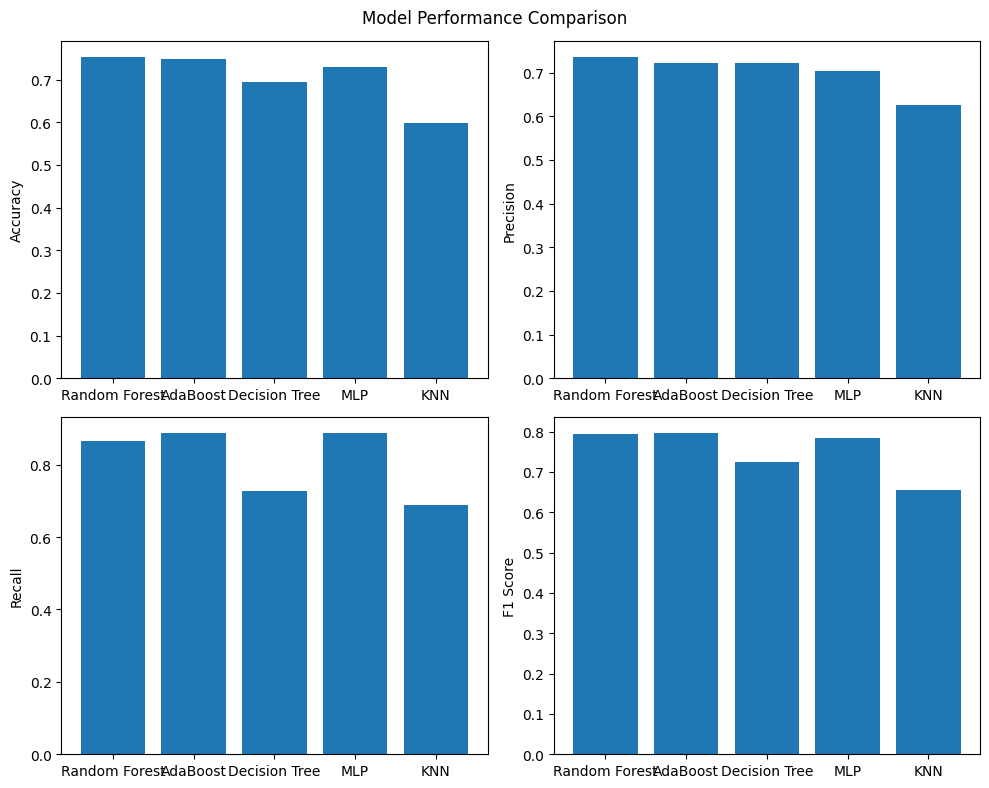

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the metrics for each model
models = list(data.keys())
accuracy = [data[model]['accuracy'] for model in models]
precision = [data[model]['precision'] for model in models]
recall = [data[model]['recall'] for model in models]
f1 = [data[model]['f1'] for model in models]

# Set the x-axis labels and positions
labels = ['Random Forest', 'AdaBoost', 'Decision Tree', 'MLP', 'KNN']
x_pos = np.arange(len(labels))

# Create the subplots for each metric
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Accuracy plot
axs[0, 0].bar(x_pos, accuracy)
axs[0, 0].set_xticks(x_pos)
axs[0, 0].set_xticklabels(labels)
axs[0, 0].set_ylabel('Accuracy')

# Precision plot
axs[0, 1].bar(x_pos, precision)
axs[0, 1].set_xticks(x_pos)
axs[0, 1].set_xticklabels(labels)
axs[0, 1].set_ylabel('Precision')

# Recall plot
axs[1, 0].bar(x_pos, recall)
axs[1, 0].set_xticks(x_pos)
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_ylabel('Recall')

# F1 plot
axs[1, 1].bar(x_pos, f1)
axs[1, 1].set_xticks(x_pos)
axs[1, 1].set_xticklabels(labels)
axs[1, 1].set_ylabel('F1 Score')

# Set the title and layout
fig.suptitle('Model Performance Comparison')
fig.tight_layout()

# Show the plot
plt.show()

## Forward and Backward Feature Selection

In [46]:
#select best user features for determining bot or not using both forwards and backwards selection

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


X_train = df_user.drop('label', axis=1)
y_train = df_user['label']

forward = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), n_features_to_select=4, direction='forward').fit(X_train, y_train)
forward_features = X_train.columns[forward.get_support()]

backward = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), n_features_to_select=4, direction='backward').fit(X_train, y_train)
backward_features = X_train.columns[backward.get_support()]

print("Top features using forward selection: ", list(forward_features))
print("Top features using backward selection: ", list(backward_features))

Top features using forward selection:  ['public_metrics.followers_count', 'public_metrics.following_count', 'public_metrics.listed_count', 'Hashtags_std']
Top features using backward selection:  ['public_metrics.followers_count', 'public_metrics.listed_count', 'Mentions_mean', 'RT']


In [51]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression


X_train = df_user.drop('label', axis=1)
y_train = df_user['label']

forward = SequentialFeatureSelector(RandomForestClassifier(), n_features_to_select=4, direction='forward').fit(X_train, y_train)
forward_features = X_train.columns[forward.get_support()]

backward = SequentialFeatureSelector(RandomForestClassifier(), n_features_to_select=4, direction='backward').fit(X_train, y_train)
backward_features = X_train.columns[backward.get_support()]

print("Top features using forward selection: ", list(forward_features))
print("Top features using backward selection: ", list(backward_features))

Top features using forward selection:  ['public_metrics.following_count', 'public_metrics.listed_count', 'Number', 'Words_mean']
Top features using backward selection:  ['public_metrics.followers_count', 'public_metrics.following_count', 'Links_mean', 'Words_mean']


# Comparison

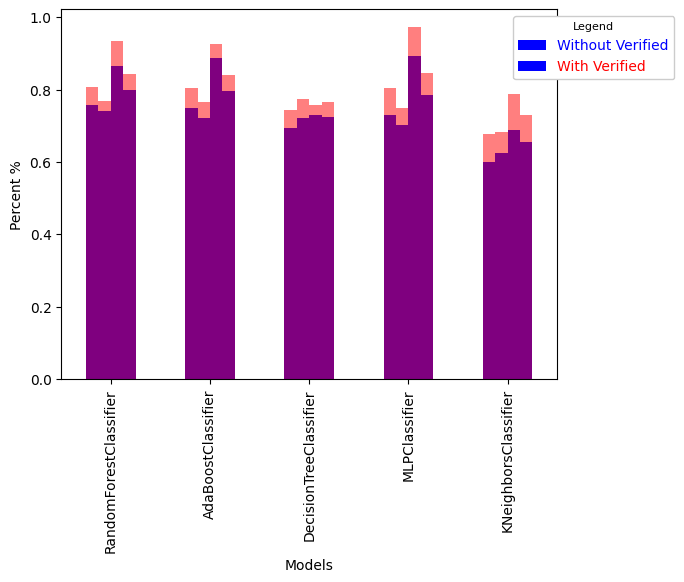

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your two dataframes into Pandas dataframes
df1 = df_results_without_verfied
df2 = df_results

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the first dataframe as a blue bar plot
df1.plot(kind='bar', ax=ax, color='blue', label= 'Without Verified')

# Plot the second dataframe as a red bar plot with a 50% transparency
df2.plot(kind='bar', ax=ax, color='red', alpha=0.5, label = "With verified")

# Set the axis labels and legend
ax.set_xlabel('Models')
ax.set_ylabel('Percent %')

# Create a dictionary of colors for the legend labels
legend_colors = {'Without Verified': 'blue', 'With Verified': 'red'}

# Add the legend to the plot with the specified colors
ax.legend(labels=legend_colors.keys(), loc='upper right', frameon=True, framealpha=1, fontsize=10,
          bbox_to_anchor=(1.25, 1), title='Legend', title_fontsize=8, labelcolor=list(legend_colors.values()))

# Show the plot
plt.show()


In [ ]:
import pickle
with open('results_v.pickle', 'wb') as f:
    pickle.dump(df_results, f)
with open('results.pickle', 'wb') as f:
    pickle.dump(df_results_without_verfied, f)